In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import shutil

# Conteggio immagini per categoria

In [4]:
path = "/home/ocelot/Desktop/CNN_RPS/Archive"
categorie = ["paper", "scissors", "rock"]
current_path = ""
for i in categorie:
    current_path = os.path.join(path, i)
    print("Numero immagini per categoria",i,"è uguale a:",str(len(os.listdir(current_path))))

    

Numero immagini per categoria paper è uguale a: 712
Numero immagini per categoria scissors è uguale a: 750
Numero immagini per categoria rock è uguale a: 726


In [5]:
def visualize(path, categorie, mode):

    fig, axs = plt.subplots(len(categorie),2)
    for counter, i in enumerate(categorie):
        generator = ritorna_immagine(path,i, mode)
        im = next(generator)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im_1= next(generator)
        im_1 = cv2.cvtColor(im_1, cv2.COLOR_BGR2RGB)
        axs[counter, 0].imshow(im)
        axs[counter,0].set_title("esempio categoria "+str(i), fontsize=9)
        axs[counter,1].set_title("esempio categoria "+str(i), fontsize=9)
        axs[counter, 1].imshow(im_1)
        axs[counter,0].axis("off")
        axs[counter,1].axis("off")
    plt.tight_layout() 
    plt.show()
    

In [6]:
def ritorna_immagine(path, categoria, mode):
    percorso = os.path.join(path, categoria)
    for i in os.listdir(percorso):
        yield cv2.imread(os.path.join(percorso, i), mode)
    
        

# Visualizzazione esempio per categoria

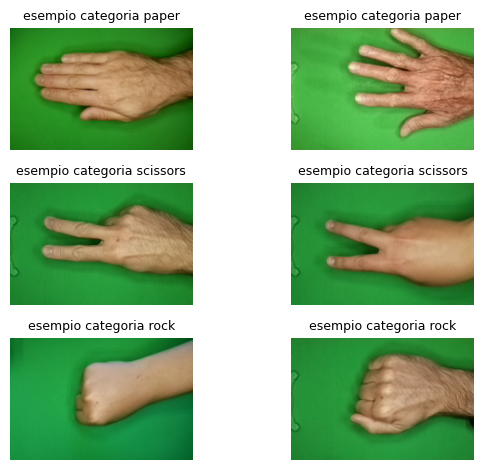

In [7]:
visualize(path, categorie, 1)

# Ispezione dimensione immagini

In [8]:
sizes = set()
for i in categorie:
    for j in ritorna_immagine(path, i, 1):
        sizes.add(j.shape)
sizes

{(200, 300, 3)}

# Creazione train,test e validation set e conversione a grayscale

In [9]:
from sklearn.model_selection import train_test_split

X = []
Y = []
for i in categorie:
    for j in ritorna_immagine(path, i, 1):
        im = cv2.cvtColor(j, cv2.COLOR_BGR2GRAY)
        X.append(im)
        Y.append(i)
x_train,x_tot,y_train,y_tot = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_tot,y_tot, test_size=1/3, stratify=y_tot, random_state=42)

In [10]:
for  n, j in enumerate(x_test):
    if os.path.exists(os.path.join(path, "test", y_test[n])):
        cv2.imwrite(os.path.join(path, "test", y_test[n], "test_{}_{}.png".format(y_test[n], str(n))), j)
    else:
        os.makedirs(os.path.join(path, "test", y_test[n]))
        cv2.imwrite(os.path.join(path, "test", y_test[n], "test_{}_{}.png".format(y_test[n], str(n))), j)
for  n, j in enumerate(x_val):
    if os.path.exists(os.path.join(path, "validation", y_val[n])):
        cv2.imwrite(os.path.join(path, "validation", y_val[n], "val_{}_{}.png".format(y_val[n], str(n))), j)
    else:
        os.makedirs(os.path.join(path, "validation", y_val[n]))
        cv2.imwrite(os.path.join(path, "validation", y_val[n], "val_{}_{}.png".format(y_val[n], str(n))), j)
for  n, j in enumerate(x_train):
    if os.path.exists(os.path.join(path, "train", y_train[n])):
        cv2.imwrite(os.path.join(path, "train", y_train[n], "train_{}_{}.png".format(y_train[n], str(n))), j)
    else:
        os.makedirs(os.path.join(path, "train", y_train[n]))
        cv2.imwrite(os.path.join(path, "train", y_train[n], "train_{}_{}.png".format(y_train[n], str(n))), j)

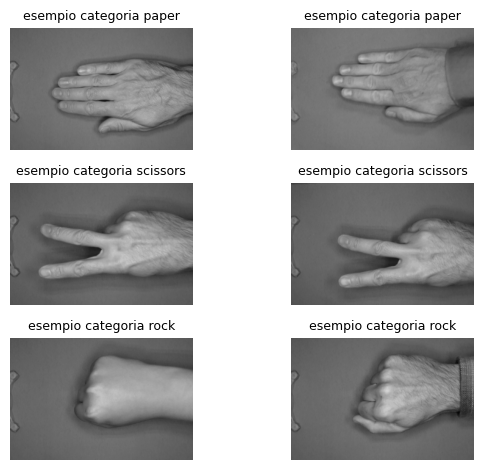

In [11]:
visualize(os.path.join(path, "test"), categorie, 0)

#  analisi intensita media

In [12]:
import numpy as np
import seaborn as sn
df = {
    "categoria": [],
    "media":[]
}

for i in categorie:
    for n,j in enumerate(ritorna_immagine(os.path.join(path,"train"), i, 0)):
        df["categoria" ].append(i)
        df["media"].append(np.mean(j))

<Axes: xlabel='categoria', ylabel='media'>

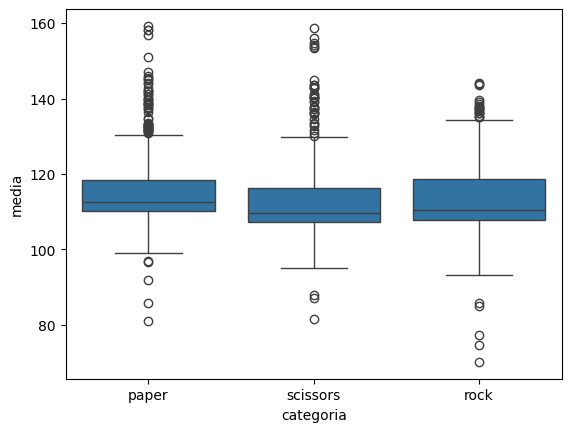

In [13]:
import pandas as pd
df = pd.DataFrame(df)
sn.boxplot(x = "categoria", y = "media", data=df)

# Analisi histogramma delle classi

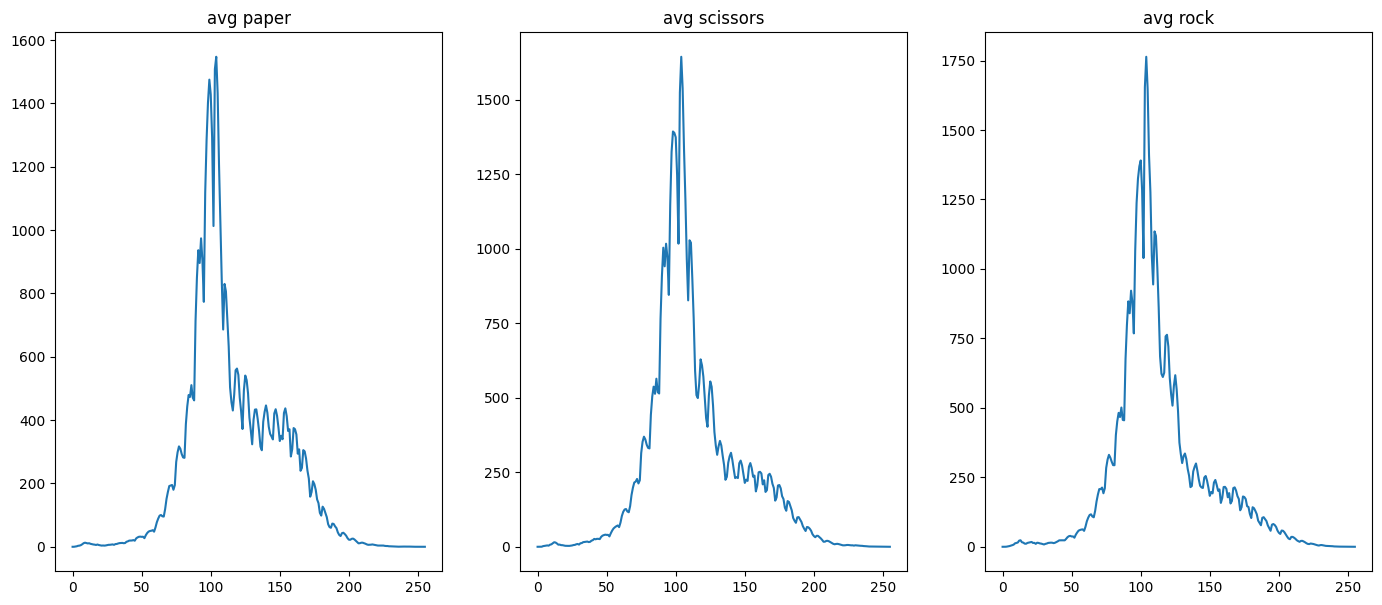

In [14]:
figure, axis = plt.subplots(1,3)
figure.set_size_inches(17,7)
avg_hist= {"paper": [], "rock":[], "scissors":[]}
for k in  categorie:
    for j in ritorna_immagine(os.path.join(path,"train"), k,0):
        avg_hist[k].append(cv2.calcHist([j], [0], None, [256], [0,256]).flatten())

axis[0].set_title("avg paper")
axis[1].set_title("avg scissors")
axis[2].set_title("avg rock")
axis[0].plot(np.arange(256), np.mean(avg_hist["paper"], axis=0))
axis[1].plot(np.arange(256), np.mean(avg_hist["scissors"], axis=0))
axis[2].plot(np.arange(256), np.mean(avg_hist["rock"], axis=0))



In [15]:
import random
random.seed(42)

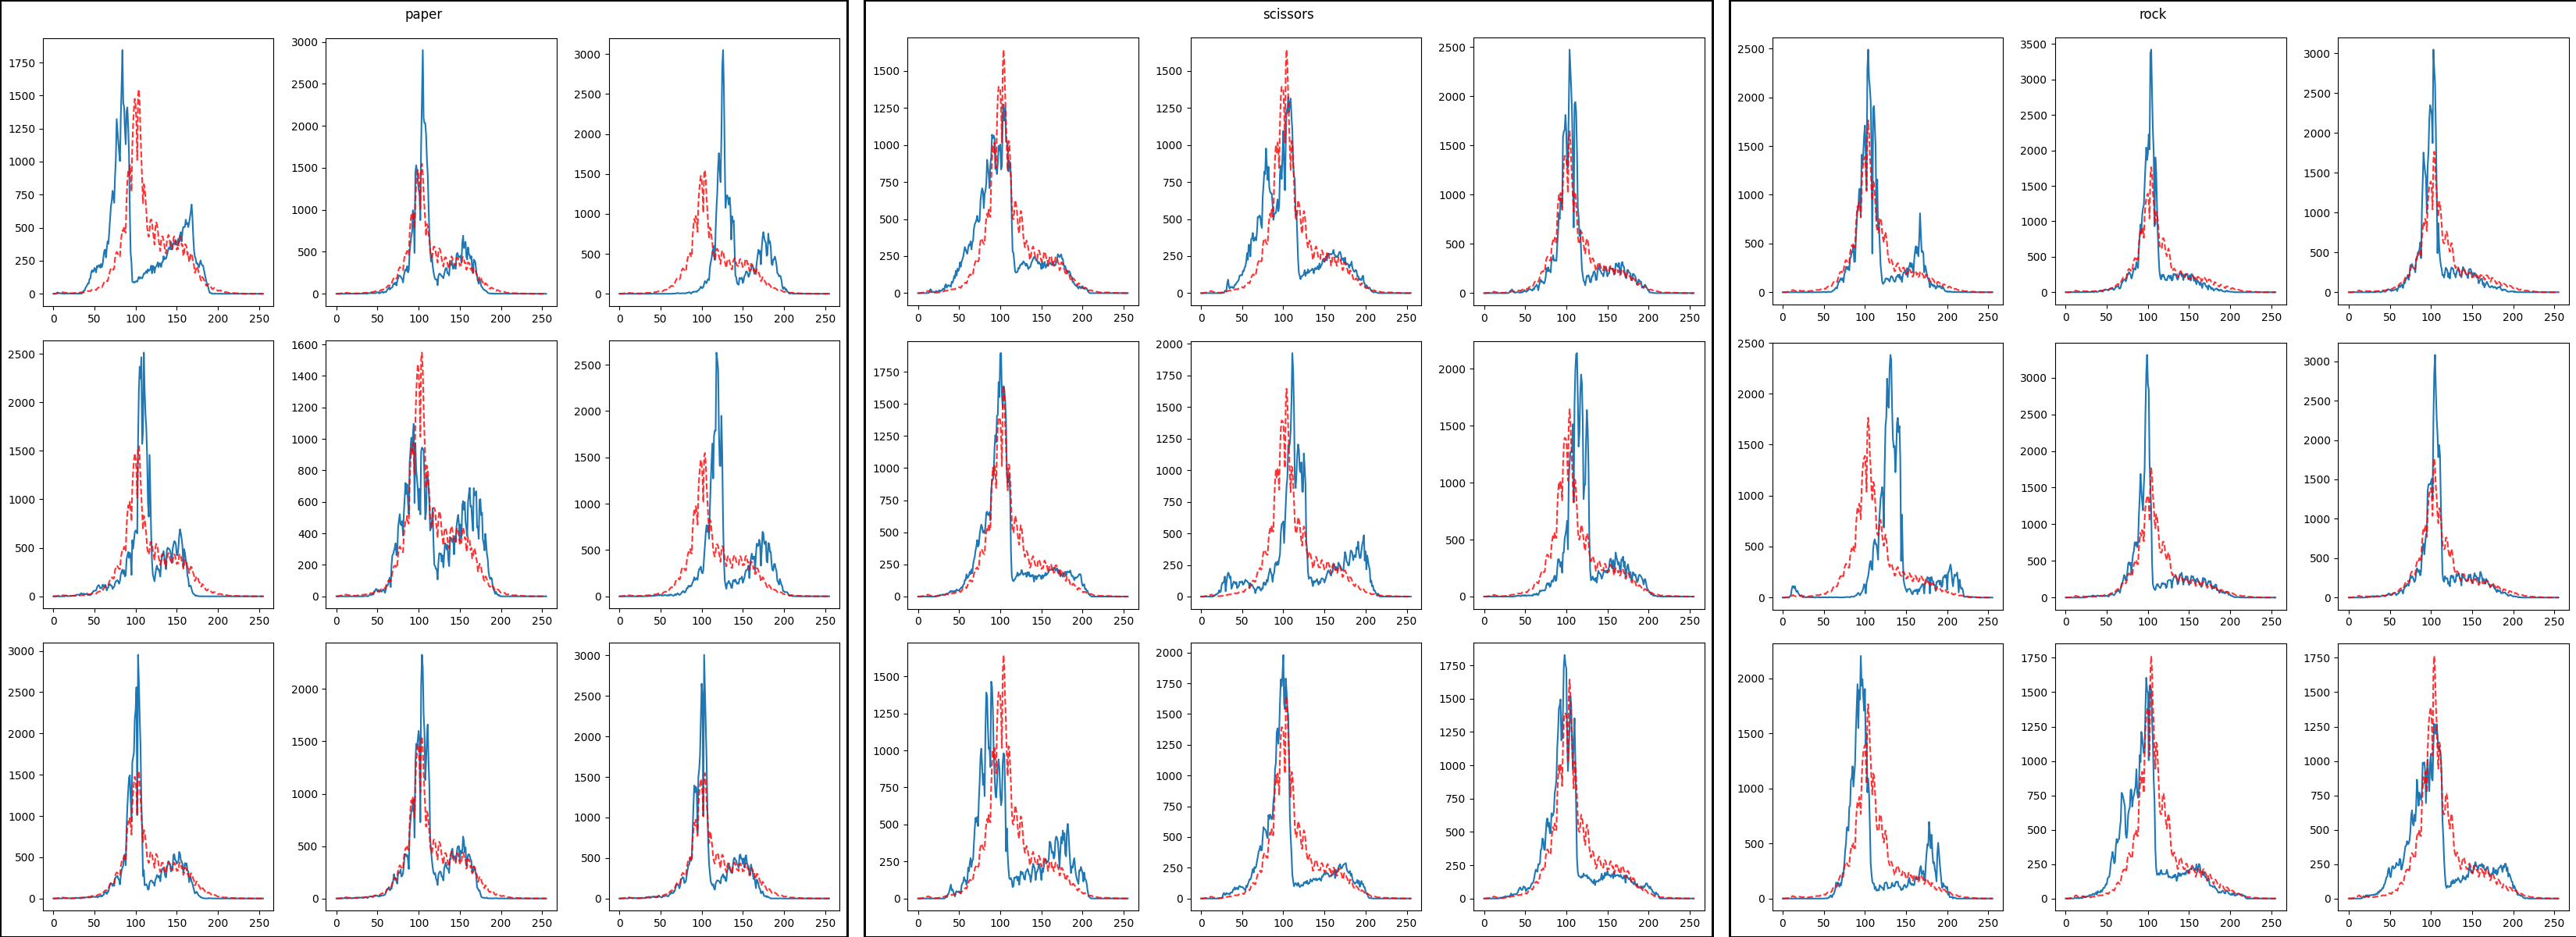

In [16]:
fig = plt.figure(figsize=(33, 12), constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.1)
subfig = fig.subfigures(1,3)
ax = []
for i in range(3):
    a = subfig[i].subplots(3,3)
    subfig[i].suptitle(categorie[i])
    subfig[i].patch.set_edgecolor('black')  
    subfig[i].patch.set_linewidth(1)    
    ax.append(a)

for k, i in enumerate(categorie):
    to_plot = random.sample(list(ritorna_immagine(os.path.join(path,"train"), i,0)), 9)
    for n, j in enumerate(to_plot):
           ax[k][n//3, n%3].plot(np.arange(256), cv2.calcHist([j], [0], None, [256], [0,256]).flatten())
           ax[k][n//3, n%3].plot(np.arange(256), np.mean(avg_hist[i], axis=0), color='red', linestyle='--', alpha=0.8, label='Class Avg')

In [17]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
for j in categorie:
    for n, k in enumerate(ritorna_immagine(os.path.join(path,"train"), j, 0)):
        im = clahe.apply(k)
        im = cv2.resize(im, (150,100), interpolation=cv2.INTER_AREA)
        if os.path.exists(os.path.join(path,"train", j+"_clahe")):
            cv2.imwrite(os.path.join(path,"train", j+"_clahe", "train"+str(n)+".png"), im)
        else:
            os.makedirs(os.path.join(path,"train", j+"_clahe"))
            cv2.imwrite(os.path.join(path,"train", j+"_clahe", "train"+str(n)+".png"), im)
    shutil.rmtree(os.path.join(path,"train",j))

In [18]:
for j in categorie:
    for n, k in enumerate(ritorna_immagine(os.path.join(path,"test"), j, 0)):
        im = clahe.apply(k)
        im = cv2.resize(im, (150,100), interpolation=cv2.INTER_AREA)
        if os.path.exists(os.path.join(path,"test", j+"_clahe")):
            cv2.imwrite(os.path.join(path,"test", j+"_clahe", "test"+str(n)+".png"), im)
        else:
            os.makedirs(os.path.join(path,"test", j+"_clahe"))
            cv2.imwrite(os.path.join(path,"test", j+"_clahe", "test"+str(n)+".png"), im)
    shutil.rmtree(os.path.join(path,"test",j))
    

In [19]:
for j in categorie:
    for n, k in enumerate(ritorna_immagine(os.path.join(path,"validation"), j, 0)):
        im = clahe.apply(k)
        im = cv2.resize(im, (150,100), interpolation=cv2.INTER_AREA)
        if os.path.exists(os.path.join(path,"validation", j+"_clahe")):
            cv2.imwrite(os.path.join(path,"validation", j+"_clahe", "val"+str(n)+".png"), im)
        else:
            os.makedirs(os.path.join(path,"validation", j+"_clahe"))
            cv2.imwrite(os.path.join(path,"validation", j+"_clahe", "val"+str(n)+".png"), im)
    shutil.rmtree(os.path.join(path,"validation",j))

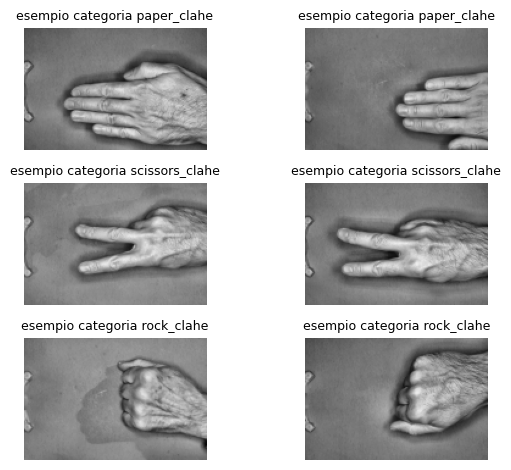

In [20]:
visualize(os.path.join(path,"train"), [i+"_clahe" for i in categorie], 0)

In [21]:
split = ["train", "validation", "test"]
for i in split:
    for j in categorie:
        os.rename(os.path.join(path, i, j+"_clahe"), os.path.join(path, i, j))
    